# **First: Exploring Data**

#USER_TAKEHOME DATA

In [1]:
#Reading USER_TAKEHOME.csv using Pandas
import pandas as pd
users = pd.read_csv('/content/drive/MyDrive/Fetch Take Home/USER_TAKEHOME.csv')
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [2]:
#Finding missing values in all columns
missing_values_in_users = users.isnull().sum()
print(missing_values_in_users)

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64


In [3]:
#Checking duplicates in the 'ID' column, as it represents the user ID and should be unique. The rest of the columns do not have to be unique.
duplicate_ids_count = users['ID'].duplicated().sum()
print(f"Number of duplicate user IDs: {duplicate_ids_count}")

Number of duplicate user IDs: 0



There are no missing values in columns 'ID' and 'CREATED_DATE'. There are no duplicates in the 'ID' column too.

With no missing values and no duplicates, the 'ID' column ensures that each record represents a unique user, which is crucial for accurate user-level analysis.

No missing values in the 'CREATED_DATE' column means that we can reliably track the user sign-up timeline, enabling accurate cohort analysis, retention studies, and user lifecycle tracking.

Nearly one-third of users have missing values in the 'LANGUAGE' column, which may impact any analysis related to language preferences or user segmentation. This missing data could be due to optional input fields or data collection issues.

A small but notable percentage of users have no 'STATE' value, which might limit location-based analysis or regional insights. Missing 'STATE' values might occur if users choose not to share their location or if it's not mandatory during sign-up.

Similarly, missing values in the BIRTH_DATE column can affect age-based analysis, user segmentation, and compliance checks, while missing values in the GENDER column may limit insights related to user preferences and behavior patterns.

Now, let's move to identifying data entry errors or other possible errors.
One possibility for identifying data entry errors is to check if the 'CREATED_DATE' is greater than the 'BIRTH_DATE', as a user's account creation date should logically occur after their birth date.

In [4]:
# Filter rows where BIRTH_DATE > CREATED_DATE
bad_rows_case_1 = users[users['BIRTH_DATE'] > users['CREATED_DATE']]
bad_rows_case_1

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
41974,5f31fc048fa1e914d38d6952,2020-08-11 02:01:41.000 Z,2020-10-02 15:27:28.000 Z,CA,NaN,NaN



There is one record where the 'CREATED_DATE'<'BIRTH_DATE'. This can be addressed by correcting the date or excluding the record from analysis.

Validating 'BIRTH_DATE' entries ensures accurate age-based segmentation, cohort analysis, and compliance checks.

In [5]:
#Handling the outlier - removing it.
users = users[users['ID'] != '5f31fc048fa1e914d38d6952']



Another way to assess the data quality of the 'USER_TAKEHOME' file is to examine the standardization of data values in each column. Columns we have to check would be: 'STATE', 'LANGUAGE' and 'GENDER'.

In [6]:
unique_values_users_state = sorted(users['STATE'].dropna().astype(str).unique())
print(unique_values_users_state)
# Used 'dropna' and 'astype' as 'STATE' column contains both string and float values - likely due to null values.

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


All the state abbreviations listed are unique. There are no duplicates.

In [7]:
unique_values_users_language = sorted(users['LANGUAGE'].dropna().astype(str).unique())
print(unique_values_users_language)

['en', 'es-419']


All the language codes listed are unique. There are no duplicates.

In [8]:
unique_values_users_gender = sorted(users['GENDER'].dropna().astype(str).unique())
print(unique_values_users_gender)

["My gender isn't listed", 'Non-Binary', 'Prefer not to say', 'female', 'male', 'non_binary', 'not_listed', 'not_specified', 'prefer_not_to_say', 'transgender', 'unknown']




**Here, we need to work on :**
*   Standardizing case formatting i.e., 'Non-Binary' as 'non_bianary'.
*   Categorizing similar values i.e., "My gender isn't listed", 'not_listed', and 'not_specified' as 'not_listed'.





In [9]:
# Mapping for gender values
gender_mapping = {
    "My gender isn't listed": "not_listed",
    "Non-Binary": "non_binary",
    "Prefer not to say": "prefer_not_to_say",
    "unknown": "not_specified"
}

# Standardize gender values
users['GENDER'] = users['GENDER'].str.lower().map(gender_mapping).fillna(users['GENDER'])


In [10]:
#Checking if the mapping worked as expected
unique_values_users_gender = sorted(users['GENDER'].dropna().astype(str).unique())
print(unique_values_users_gender)

["My gender isn't listed", 'Non-Binary', 'Prefer not to say', 'female', 'male', 'non_binary', 'not_listed', 'not_specified', 'prefer_not_to_say', 'transgender']



Standardization done.

In [11]:
#Handling NaN's in columns - STATE, LANGUAGE, GENDER.
users['GENDER'] = users['GENDER'].fillna('not_specified')
users['LANGUAGE'] = users['LANGUAGE'].fillna('not_specified')
users['STATE'] = users['STATE'].fillna('not_specified')

In [12]:
#Handling NaN's in date columns
# Convert to datetime with NaT for invalid or missing values
users.loc[:, 'CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], errors='coerce', format='%Y-%m-%d %H:%M:%S.%f Z')
users.loc[:, 'BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], errors='coerce', format='%Y-%m-%d %H:%M:%S.%f Z')


In [13]:
users

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54,2000-08-11 00:00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55,2001-09-24 04:00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18,1994-10-28 00:00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22,NaT,NC,en,not_specified
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50,1972-03-19 00:00:00,PA,en,female
...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12,1992-03-16 08:00:00,CA,en,female
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39,1993-09-23 05:00:00,MO,en,female
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05,1983-04-19 00:00:00,RI,en,female
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04,1995-06-09 04:00:00,DE,en,female


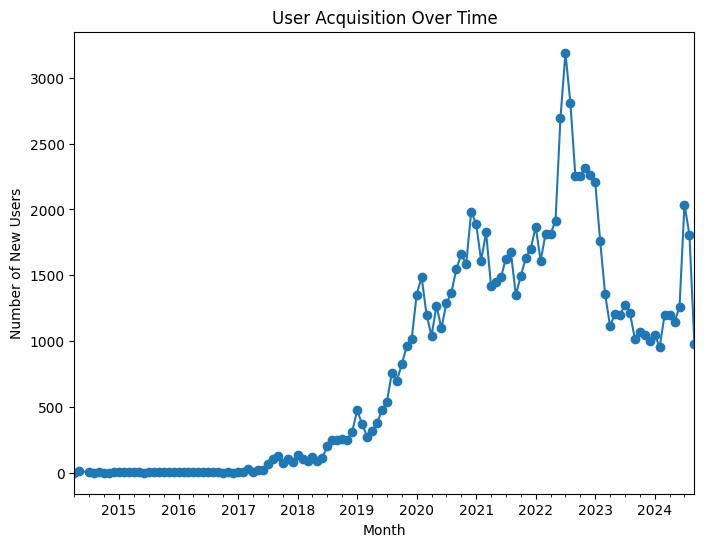

In [14]:
#One interesting insight we can draw - User Acquisition over time
import matplotlib.pyplot as plt
# Group by month and count users
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], errors='coerce')
user_growth = users.groupby(users['CREATED_DATE'].dt.to_period('M')).size()
# Plot line chart
user_growth.plot(kind='line', marker='o', figsize=(8, 6), title='User Acquisition Over Time')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.show()




Now, moving to


# TRANSACTION_TAKEHOME DATA

In [15]:
transactions = pd.read_csv('/content/drive/MyDrive/Fetch Take Home/TRANSACTION_TAKEHOME.csv')
transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [16]:
missing_values = transactions.isnull().sum()
print(missing_values)

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


Now, let's check if there are any exact duplicates.

In [17]:
duplicates_transactions = transactions[transactions.duplicated()]
print(f"Exact duplicates (all columns): {duplicates_transactions.shape[0]}")


Exact duplicates (all columns): 171



171 exact duplicates mean that a few receipts were scanned multiple times (or) logged twice into the system (or) system glitches (or) manual data entry errors.

In [18]:
#Dropping the excat duplicates
transactions = transactions.drop_duplicates()

In [19]:
transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00



If we see transactions data now and when we sort 'FINAL_QUANTITY' with records with 'zero' on top, there are few records with boht 'FINAL_QUANTITY' as "zero" and 'FINAL_SALE' as zero - should likely be removed because they indicate no items were purchased - helps avoid data skewing.

In [20]:
# Convert columns to numeric (handle 'zero' as 0), using .loc
transactions.loc[:, 'FINAL_QUANTITY'] = pd.to_numeric(transactions['FINAL_QUANTITY'], errors='coerce')
transactions.loc[:, 'FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors='coerce')

# Remove rows with zero FINAL_QUANTITY & zero FINAL_SALE
transactions = transactions[(transactions['FINAL_QUANTITY'] > 0) & (transactions['FINAL_SALE'] > 0)]

In [21]:
transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,2024-08-20,2024-08-20 11:17:29.633 Z,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,7.455271e+11,1.0,1.65
25001,04869b68-29e3-4e8d-9bdb-950046fc3473,2024-08-05,2024-08-09 16:06:00.570 Z,DOLLAR GENERAL STORE,654cf234a225ea102b81072e,7.455271e+11,1.0,1.65
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,2024-09-03,2024-09-03 11:28:25.264 Z,WALMART,63c1cb6d3d310dceeac55487,3.700083e+10,1.0,28.22
25003,7ee1798e-fd2e-4278-838b-f417fdcafe08,2024-08-30,2024-09-04 12:53:31.478 Z,DOLLAR GENERAL STORE,65c29b137050d0a6206cd24f,1.200050e+10,1.0,5.25
25004,21feab39-49f2-42e9-ae69-10371e2fc0a9,2024-08-23,2024-08-27 10:45:00.125 Z,TARGET,61a58ac49c135b462ccddd1c,2.400039e+10,1.0,2.59
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.0,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.0,2.0
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.0,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.0,3.0


In [22]:
#Checking duplicates by RECEIPT ID
duplicates_receipt = transactions[transactions.duplicated(subset=['RECEIPT_ID'], keep=False)]
print(f"Duplicates in RECEIPT_ID: {duplicates_receipt.shape[0]}")


Duplicates in RECEIPT_ID: 796


In [23]:
#Verifying the above result - value 796 and looking closer.
import sqlite3
# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
# Load the DataFrame into the SQLite database
transactions.to_sql('transactions', conn, index=False, if_exists='replace')

24538

In [24]:
# Execute the query
query = """
SELECT RECEIPT_ID, COUNT(*) as COUNT
FROM transactions
GROUP BY RECEIPT_ID

UNION ALL

SELECT 'TOTAL', SUM(COUNT)
FROM (
    SELECT COUNT(*) as COUNT
    FROM transactions
    GROUP BY RECEIPT_ID
) subquery;
"""

result = pd.read_sql_query(query, conn)
result

#This would help us view receipts with highest number of items too.

,RECEIPT_ID,COUNT
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,1
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,1
2,00017e0a-7851-42fb-bfab-0baa96e23586,1
3,000239aa-3478-453d-801e-66a82e39c8af,1
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,1
...,...,...
24128,fff6c6c8-e002-4262-85ea-25849d9721db,1
24129,fffbb112-3cc5-47c2-b014-08db2f87e0c7,1
24130,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,1
24131,fffe8012-7dcf-4d84-b6c6-feaacab5074a,1



Each RECEIPT_ID should represent one shopping trip. If there are multiple rows with the same RECEIPT_ID, it could mean:
*   The receipt has multiple items (this is valid).
*   The same item appears more than once (this might be a mistake) i.e., for instance, a receipt has two rows with the same BARCODE, but the customer only bought one unit of that item.

In [25]:
duplicates_receipt

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,2024-09-03,2024-09-03 11:28:25.264 Z,WALMART,63c1cb6d3d310dceeac55487,3.700083e+10,1.0,28.22
25054,f58e3587-661d-4e6a-a893-be9a51bbfc3a,2024-08-11,2024-08-12 15:24:28.512 Z,WALMART,61f7455aa04389107533ee66,6.811314e+11,1.0,2.0
25135,ef5523d1-538c-4bfd-8681-ec02a1b285e6,2024-07-09,2024-07-09 17:05:40.434 Z,CVS,635c50997a9e17cb6a66206e,NaN,1.0,12.54
25150,fc4c1af6-cc28-4782-87c9-38f76cde86ff,2024-09-03,2024-09-04 18:21:15.707 Z,WALMART,639fa9a01fabddec3d99ceb1,6.053882e+11,1.0,1.24
25197,47ca333c-0e56-46cb-82df-ac68bd346dd7,2024-07-22,2024-07-23 12:18:53.075 Z,WALMART,664129ddb7b24d45d93b1860,7.225101e+11,1.0,6.47
...,...,...,...,...,...,...,...,...
49770,7e2ba7e8-d3ee-4071-9f0b-525c81bc877a,2024-08-12,2024-08-12 16:30:57.302 Z,DOLLAR GENERAL STORE,61ed9ed9c0fa8076f3e970a3,5.100023e+10,1.0,1.25
49777,f1744040-2fe9-4f69-828c-3ada26f9c808,2024-07-10,2024-07-10 21:52:44.899 Z,WALMART,66651af0e04f743a096e3bf9,7.146410e+10,1.0,1.87
49793,fba4d7b3-3b46-44e9-b982-c32e4536bdb2,2024-08-12,2024-08-23 16:37:30.376 Z,WALMART,62a001ba1f9dbf1584c5e5a4,2.700042e+10,1.0,2.78
49968,a4fe3d17-3bb2-4afc-a7bc-ec7f5f913bff,2024-06-30,2024-06-30 23:32:13.605 Z,FRED MEYER,5912a4f4e4b0bb12e07a164c,3.620000e+10,1.0,1.49


In [26]:
# Find rows where the same RECEIPT_ID and BARCODE appear more than once
duplicate_items_within_receipt = duplicates_receipt[duplicates_receipt.duplicated(subset=['RECEIPT_ID', 'BARCODE'], keep=False)]
# Count and display these rows
print(f"Total rows with repeated items within the same receipt: {duplicate_items_within_receipt.shape[0]}")

Total rows with repeated items within the same receipt: 103



103 rows have the same RECEIPT_ID and BARCODE, meaning the same item appears more than once within the same receipt. This could indicate:
*  The customer bought multiple units of the same product (valid).
*  The item was scanned more than once by mistake (invalid).




Let's also identify any inconsistent receipts where the same RECEIPT_ID appears with different dates or users -if any.

In [27]:
# Group by RECEIPT_ID and check for multiple unique dates or users
receipt_variations = duplicates_receipt.groupby('RECEIPT_ID').agg({
    'SCAN_DATE': pd.Series.nunique,
    'PURCHASE_DATE': pd.Series.nunique,
    'USER_ID': pd.Series.nunique
}).reset_index()

# Identify receipts with variations
multiple_variations = receipt_variations[(receipt_variations['SCAN_DATE'] > 1) |
                                         (receipt_variations['PURCHASE_DATE'] > 1) |
                                         (receipt_variations['USER_ID'] > 1)]

print(f"Total receipts with variations in dates or users: {multiple_variations.shape[0]}")


Total receipts with variations in dates or users: 0


Therefore,

No data inconsistencies were found in terms of dates or users!

For every RECEIPT_ID, there is only:
One unique SCAN_DATE (the date the receipt was scanned).

*   One unique SCAN_DATE (the date the receipt was scanned).
*   One unique PURCHASE_DATE (the date the purchase happened).
*   One unique USER_ID (the user who scanned the receipt).




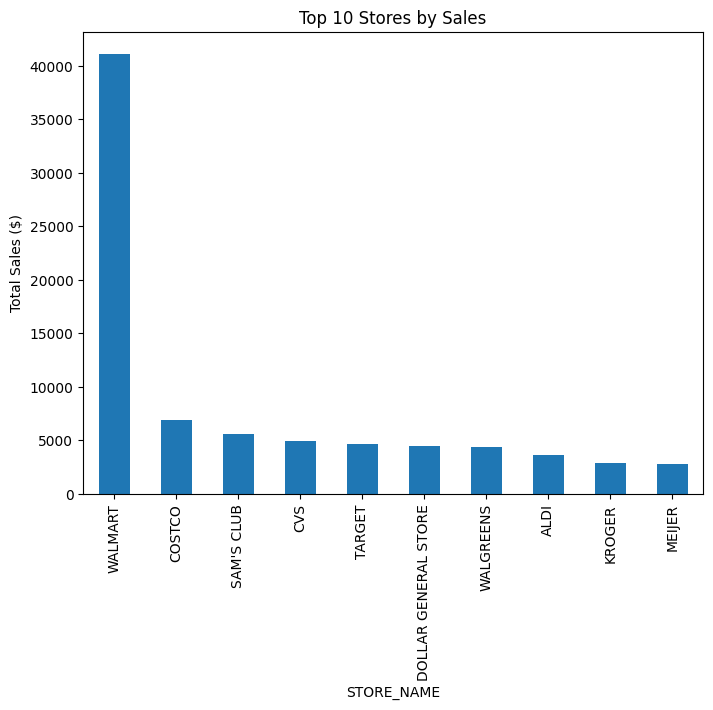

In [28]:
#One interesting insight we can view - Sales Distribution by Store - Top 10.
# Calculate total sales per store
store_sales = transactions.groupby('STORE_NAME')['FINAL_SALE'].sum().sort_values(ascending=False).head(10)
# Plot bar chart
store_sales.plot(kind='bar', figsize=(8, 6), title='Top 10 Stores by Sales')
plt.ylabel('Total Sales ($)')
plt.show()


<ipython-input-29-611b98ac2b71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'], errors='coerce')


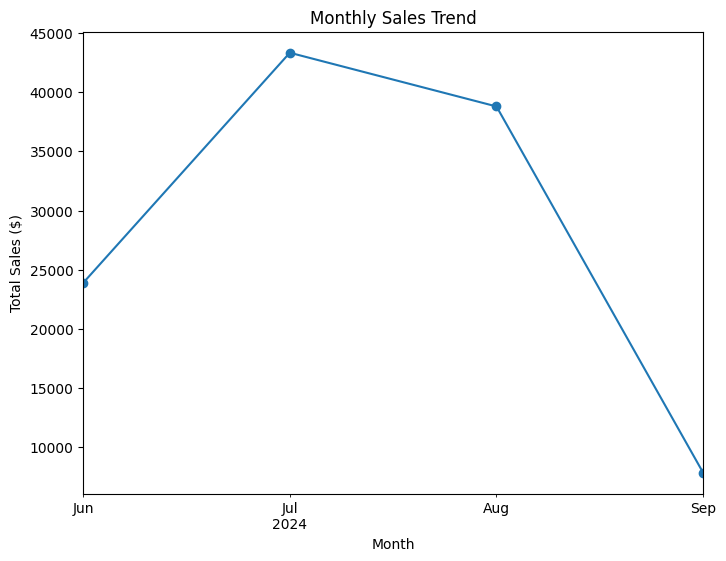

In [29]:
#Another noteworthy chart - Monthly Sales Trend
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'], errors='coerce')

# Group by month and sum sales
monthly_sales = transactions.groupby(transactions['PURCHASE_DATE'].dt.to_period('M'))['FINAL_SALE'].sum()
# Plot line chart
monthly_sales.plot(kind='line', marker='o', figsize=(8, 6), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()



Next, moving to

# PRODUCTS_TAKEHOME DATA

In [30]:
products = pd.read_csv('/content/drive/MyDrive/Fetch Take Home/PRODUCTS_TAKEHOME.csv')
products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [31]:
#Checking on missing values
#Count missing values in each column
missing_values = products.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


There are missing values in BARCODE column. Barcodes act as a unique product ID, essential for tracking and sales. Missing barcodes may cause issues in linking products to transactions or other datasets. Let;s drop these rows.

In [32]:
products = products.dropna(subset=['BARCODE'])

In [33]:
# Let's filter rows where all four categories are null or blank
blank_categories = products[products[['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']].isnull().all(axis=1)]
blank_categories

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
5184,NaN,NaN,NaN,NaN,KEURIG DR PEPPER,POLAR,7.153711e+11
15048,NaN,NaN,NaN,NaN,THE COCA-COLA COMPANY,COCA-COLA,1.963655e+11
25313,NaN,NaN,NaN,NaN,MOLSONCOORS,COORS LIGHT,1.981811e+11
35604,NaN,NaN,NaN,NaN,THE COCA-COLA COMPANY,COCA-COLA,1.969831e+11
43214,NaN,NaN,NaN,NaN,KEURIG DR PEPPER,POLAR,6.443761e+11
...,...,...,...,...,...,...,...
815098,NaN,NaN,NaN,NaN,MOLSONCOORS,COORS LIGHT,1.981811e+11
828059,NaN,NaN,NaN,NaN,PEPSICO,CHEETOS,2.840072e+10
838895,NaN,NaN,NaN,NaN,THE COCA-COLA COMPANY,COCA-COLA,1.969831e+11
841164,NaN,NaN,NaN,NaN,MOLSONCOORS,COORS LIGHT,1.981811e+11


If all four category columns (CATEGORY_1, CATEGORY_2, CATEGORY_3, and CATEGORY_4) are missing, here are the possible inferences:
*   Data entry or system error
*   These could be products that don't fit into existing categories or were never assigned one.
*   Might be archived or discontinued products - category information might have been removed or never assigned.

Let's leave them as-is for now.





In [34]:
# Find duplicate barcodes
duplicate_barcodes = products[products.duplicated(subset=['BARCODE'], keep=False)]
duplicate_barcodes

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
162,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,PLACEHOLDER MANUFACTURER,PRORASO,80199137.0
2588,Snacks,Candy,Mints,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3400203.0
9443,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,WHATCHAMACALLIT,3429907.0
9641,Snacks,Candy,Mints,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3409800.0
14607,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811.0
...,...,...,...,...,...,...,...
827242,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,3423905.0
834874,Snacks,Nuts & Seeds,Peanuts,NaN,NaN,NaN,3415207.0
838643,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3473108.0
841230,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,404310.0


We can see some exact duplicates.

In [35]:
# Remove exact duplicates (all columns match)
products = products.drop_duplicates()

In [36]:
#We can obeserve same barcodes with different row values.To handle these duplciate barcodes, we can keep the 1st occurences or select the most complete row. I will pick the most complete row approach.
# Count non-null values in each row
products['non_null_count'] = products.notnull().sum(axis=1)
# Sort rows by number of non-null values - descending, drop duplicates by BARCODE, and keep the first
products = products.sort_values(by='non_null_count', ascending=False).drop_duplicates(subset=['BARCODE'], keep='first').drop(columns=['non_null_count'])

In [37]:
products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
421677,Alcohol,Beer,Lager,American Lager,MOLSONCOORS,COORS LIGHT,7.199032e+10
530007,Health & Wellness,Medicines & Treatments,Cough & Cold Medicines & Treatments,Cough & Chest Congestion Medicines & Treatments,PROCTER & GAMBLE,VICKS,4.644064e+11
60875,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,PLACEHOLDER MANUFACTURER,ANDIS,4.010238e+10
60874,Health & Wellness,Medicines & Treatments,Digestive Health Medicines & Treatments,Anti Diarrheal Medicines & Treatments,JOHNSON & JOHNSON,MOTRIN,7.645661e+11
530004,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,CONAIR LLC,CONAIR,1.915661e+11
...,...,...,...,...,...,...,...
327623,Health & Wellness,Medical Supplies & Equipment,NaN,NaN,NaN,NaN,6.364223e+11
327618,Health & Wellness,Medical Supplies & Equipment,NaN,NaN,NaN,NaN,6.961777e+11
658292,Snacks,Cookies,NaN,NaN,NaN,NaN,8.531520e+11
739975,Snacks,Cookies,NaN,NaN,NaN,NaN,7.209963e+11


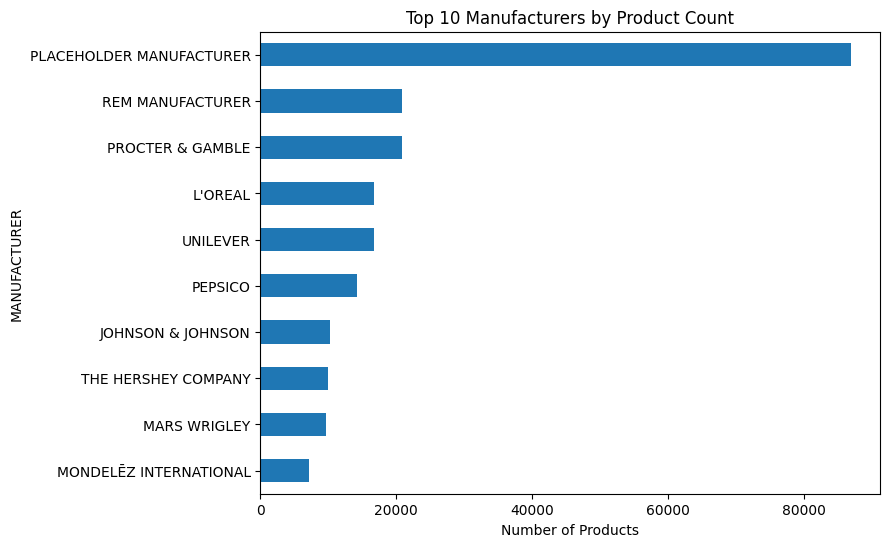

In [38]:
#Let's view some charts - Top Ten Manufacturers by Product Count
top_manufacturers = products['MANUFACTURER'].value_counts().head(10)
# Plot horizontal bar chart
top_manufacturers.sort_values().plot(kind='barh', figsize=(8, 6), title='Top 10 Manufacturers by Product Count')
plt.xlabel('Number of Products')
plt.show()


Placeholder Manufacturer - indicates that the actual manufacturer name was unknown, unavailable, or temporarily substituted during data entry or system imports.

In [39]:
#Another Chart - Top 10 Product Categories by Product Count - Looking at CATEGORY 1
import plotly.express as px
category_counts = products['CATEGORY_1'].value_counts().reset_index()
category_counts.columns = ['CATEGORY_1', 'Count']
# Interactive Chart with Slicer
fig = px.bar(
    category_counts.head(10),
    x='Count',
    y='CATEGORY_1',
    orientation='h',
    title='Top 10 Product Categories by Product Count',
    text='Count'
)
# Add interactive slider for filtering values
fig.update_layout(
    xaxis=dict(title='Number of Products'),
    yaxis=dict(title='Category'),
    sliders=[{
        "active": 0,
        "currentvalue": {"prefix": "Minimum Count: "},
        "steps": [
            {"label": f">= {i}", "method": "update", "args": [{"x": [category_counts[category_counts['Count'] >= i]['Count']]}]}
            for i in range(0, int(category_counts['Count'].max()), int(category_counts['Count'].max()/10))
        ]
    }]
)

fig.show()


Added an interactive slicer as some bars have a lower product count.

#**Second: provide SQL queries**


#**Closed-ended questions**


1.What are the top 5 brands by receipts scanned among users 21 and over?

In [40]:
!pip install duckdb

In [41]:
import duckdb
import pandas as pd
# Connect to an in-memory DuckDB database
conn = duckdb.connect(database=':memory:')
# Load DataFrames directly into DuckDB
conn.register('users', users)
conn.register('products', products)
conn.register('transactions', transactions)


In [42]:
query = """
SELECT LOWER(p.BRAND) AS BRAND, COUNT(t.RECEIPT_ID) AS receipt_count
FROM transactions t
INNER JOIN users u ON t.USER_ID = u.ID
INNER JOIN products p ON t.BARCODE = p.BARCODE
WHERE EXTRACT(YEAR FROM AGE(u.BIRTH_DATE)) >= 21
GROUP BY LOWER(p.BRAND)
ORDER BY receipt_count DESC
LIMIT 5;
"""
# Execute the query and return results as a DataFrame
df = conn.execute(query).fetch_df()
df
# ---"None" brand here are the brand missing values---

,BRAND,receipt_count
0,None,3
1,dove,3
2,nerds candy,3
3,hershey's,2
4,sour patch kids,2


In [43]:
#To exclude 'None', we can use the below query
query = """
SELECT LOWER(p.BRAND) AS BRAND, COUNT(t.RECEIPT_ID) AS receipt_count
FROM transactions t
INNER JOIN users u ON t.USER_ID = u.ID
INNER JOIN products p ON t.BARCODE = p.BARCODE
WHERE EXTRACT(YEAR FROM AGE(u.BIRTH_DATE)) >= 21
  AND p.BRAND IS NOT NULL
GROUP BY LOWER(p.BRAND)
ORDER BY receipt_count DESC
LIMIT 5;
"""
# Execute the query and return results as a DataFrame
df = conn.execute(query).fetch_df()
df

,BRAND,receipt_count
0,nerds candy,3
1,dove,3
2,hershey's,2
3,sour patch kids,2
4,meijer,2


In [44]:
query = """
WITH RankedBrands AS (
    SELECT p.BRAND, COUNT(t.RECEIPT_ID) AS receipt_count,
           RANK() OVER (ORDER BY COUNT(t.RECEIPT_ID) DESC) AS rank
    FROM transactions t
    INNER JOIN users u ON t.USER_ID = u.ID
    INNER JOIN products p ON t.BARCODE = p.BARCODE
    WHERE EXTRACT(YEAR FROM AGE(u.BIRTH_DATE)) >= 21
      AND p.BRAND IS NOT NULL
    GROUP BY p.BRAND
)
SELECT BRAND, receipt_count
FROM RankedBrands
WHERE rank <= 5
   OR receipt_count = (
       SELECT receipt_count
       FROM RankedBrands
       ORDER BY receipt_count DESC
       LIMIT 1 OFFSET 4  -- Get the 5th highest count
   )
ORDER BY receipt_count DESC, BRAND ASC;

"""
# Execute the query and return results as a DataFrame
df = conn.execute(query).fetch_df()
df

,BRAND,receipt_count
0,DOVE,3
1,NERDS CANDY,3
2,COCA-COLA,2
3,GREAT VALUE,2
4,HERSHEY'S,2
5,MEIJER,2
6,SOUR PATCH KIDS,2
7,TRIDENT,2


The above query handles multiple brands with the same number of receipts as the 5th brand - all of them are included in the result.

2. What are the top 5 brands by sales among users that have had their account for at least six months?

In [45]:
query = """
SELECT p.BRAND, SUM(t.FINAL_SALE) AS total_sales
FROM transactions t
INNER JOIN users u ON t.USER_ID = u.ID
INNER JOIN products p ON t.BARCODE = p.BARCODE
WHERE DATE_DIFF('month', u.CREATED_DATE, CURRENT_DATE) >= 6
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 5;
"""
# Execute the query and return results as a DataFrame
df = conn.execute(query).fetch_df()
df

,BRAND,total_sales
0,CVS,72.00
1,DOVE,30.91
2,TRIDENT,23.36
3,COORS LIGHT,17.48
4,TRESEMMÉ,14.58


3. What is the percentage of sales in the Health & Wellness category by generation?

In [46]:
query = """
WITH GenerationSales AS (
    SELECT
        CASE
            WHEN DATE_DIFF('year', u.BIRTH_DATE, CURRENT_DATE) >= 78 THEN 'Silent Generation'
            WHEN DATE_DIFF('year', u.BIRTH_DATE, CURRENT_DATE) BETWEEN 59 AND 77 THEN 'Baby Boomers'
            WHEN DATE_DIFF('year', u.BIRTH_DATE, CURRENT_DATE) BETWEEN 43 AND 58 THEN 'Gen X'
            WHEN DATE_DIFF('year', u.BIRTH_DATE, CURRENT_DATE) BETWEEN 27 AND 42 THEN 'Millennials'
            WHEN DATE_DIFF('year', u.BIRTH_DATE, CURRENT_DATE) BETWEEN 11 AND 26 THEN 'Gen Z'
            ELSE 'Other'
        END AS generation,
        SUM(t.FINAL_SALE) AS total_sales
    FROM transactions t
    INNER JOIN users u ON t.USER_ID = u.ID
    INNER JOIN products p ON t.BARCODE = p.BARCODE
    WHERE p.CATEGORY_1 = 'Health & Wellness'
    GROUP BY generation
),
TotalSales AS (
    SELECT SUM(total_sales) AS total_health_sales FROM GenerationSales
)
SELECT
    generation,
    total_sales,
    ROUND((total_sales / total_health_sales) * 100, 2) AS percentage_of_sales
FROM GenerationSales, TotalSales
ORDER BY total_sales DESC;
"""

# Execute the query and get the result as a DataFrame
df = conn.execute(query).fetch_df()
df


,generation,total_sales,percentage_of_sales
0,Baby Boomers,89.44,56.06
1,Gen X,49.89,31.27
2,Millennials,20.21,12.67


#**Open-ended questions**

1. Who are Fetch’s power users?

Power users are customers who interact with the platform frequently and contribute significantly to sales. They can be identified based on:

- High purchase frequency (number of receipts scanned)
- High total spending (cumulative sales amount)
- Long-term engagement (account age)
- Diverse purchases (variety of brands or categories)

In [47]:
#purchase frequency per user
query = """
SELECT u.ID, u.CREATED_DATE, COUNT(t.RECEIPT_ID) AS purchase_count
FROM transactions t
INNER JOIN users u ON t.USER_ID = u.ID
GROUP BY u.ID, u.CREATED_DATE
ORDER BY purchase_count DESC;
"""

df_purchase_count = conn.execute(query).fetch_df()
df_purchase_count


,ID,CREATED_DATE,purchase_count
0,61a58ac49c135b462ccddd1c,2021-11-30 02:21:56,3
1,6528a0a388a3a884364d94dc,2023-10-13 01:42:59,3
2,646bdaa67a342372c857b958,2023-05-22 21:12:06,3
3,610a8541ca1fab5b417b5d33,2021-08-04 12:17:05,3
4,62ffec490d9dbaff18c0a999,2022-08-19 20:02:17,3
...,...,...,...
86,64b195bd480825afb3d43809,2023-07-14 18:36:45,1
87,5fcd25273f814c1271450841,2020-12-06 18:38:31,1
88,63faaa3e38f010745ba05f9f,2023-02-26 00:39:26,1
89,65ff60725a33935f1ed9176c,2024-03-23 23:06:26,1


In [48]:
# total spending per user
query = """
SELECT u.ID, SUM(t.FINAL_SALE) AS total_spending
FROM transactions t
INNER JOIN users u ON t.USER_ID = u.ID
GROUP BY u.ID
ORDER BY total_spending DESC;
"""

df_total_spending = conn.execute(query).fetch_df()
df_total_spending

,ID,total_spending
0,643059f0838dd2651fb27f50,75.99
1,62ffec490d9dbaff18c0a999,26.14
2,5f4c9055e81e6f162e3f6fa8,18.98
3,5d191765c8b1ba28e74e8463,17.48
4,61a58ac49c135b462ccddd1c,14.99
...,...,...
86,5db603f8b68dbf3bc96f3c73,0.97
87,62fd767c30b23c82199243ad,0.97
88,63b4d64d9f3fc9c75475950a,0.67
89,62b670ae37e6e08b0774ef35,0.64


In [49]:
#user account age - months
query = """
SELECT u.ID, DATE_DIFF('month', u.BIRTH_DATE, CURRENT_DATE) AS account_age_months
FROM users u
ORDER BY account_age_months DESC;
"""

df_account_age = conn.execute(query).fetch_df()
df_account_age


,ID,account_age_months
0,57ac7acde4b0d25aa48097bc,1501.0
1,54e7918de4b0b56c0b136f3a,1501.0
2,5b343b1a8c5ff7623be2af93,1491.0
3,6108a98aa1ffea0b098ba933,1490.0
4,624a049c89dfe41b042fe072,1489.0
...,...,...
99994,651cc4b055f575777d10c55e,NaN
99995,65fc1b855a33935f1ed8a602,NaN
99996,65fce2a57756e548cb85ed9f,NaN
99997,654cd6b5a225ea102b810475,NaN


In [50]:
#purchase diversity - brands and categories
query = """
SELECT u.ID, COUNT(DISTINCT p.BRAND) AS unique_brands, COUNT(DISTINCT p.CATEGORY_1) AS unique_categories
FROM transactions t
INNER JOIN users u ON t.USER_ID = u.ID
INNER JOIN products p ON t.BARCODE = p.BARCODE
GROUP BY u.ID
ORDER BY unique_brands DESC, unique_categories DESC;
"""

df_diversity = conn.execute(query).fetch_df()
df_diversity


,ID,unique_brands,unique_categories
0,5b441360be53340f289b0795,2,2
1,646bdaa67a342372c857b958,2,2
2,610a8541ca1fab5b417b5d33,2,1
3,6661ed1e7c0469953bfc76c4,2,1
4,65044dc5fe41d365c2ed7d71,2,1
5,5c6c2998b06c0045a4fddc74,2,1
6,62c09104baa38d1a1f6c260e,2,1
7,63c8294d39c79dcbdd5c1e4f,2,1
8,5ca54049adfcb4140b54e1bf,1,2
9,6323afdd138f4b3c62bc6e03,1,1


In [51]:
# Merge all four DataFrames
df_power_users = df_purchase_count \
    .merge(df_total_spending, on='ID', how='inner') \
    .merge(df_account_age, on='ID', how='inner') \
    .merge(df_diversity, on='ID', how='inner')


Also, we can combine all these metrics into a single KPI column using a weighted scoring system. This approach is often called a Customer Power Score (CPS) or Customer Engagement Score. Assign weights to each metric based on its importance. For example:

- Purchase Count: 30% weight (shows engagement frequency)
- Total Spending: 30% weight (indicates value to the business)
- Account Age: 20% weight (represents long-term loyalty)
- Unique Brands: 10% weight (measures diversity of purchases)
- Unique Categories: 10% weight (shows breadth of engagement)


In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Select relevant columns
metrics = ['purchase_count', 'total_spending', 'account_age_months', 'unique_brands', 'unique_categories']

# Normalize each metric using MinMaxScaler
scaler = MinMaxScaler()
df_power_users[metrics] = scaler.fit_transform(df_power_users[metrics])

# Assign weights to each metric
df_power_users['Power_User_Score'] = (
    df_power_users['purchase_count'] * 0.3 +
    df_power_users['total_spending'] * 0.3 +
    df_power_users['account_age_months'] * 0.2 +
    df_power_users['unique_brands'] * 0.1 +
    df_power_users['unique_categories'] * 0.1
)

# Sort by the highest Power User Score
df_power_users = df_power_users.sort_values(by='Power_User_Score', ascending=False)

df_power_users


,ID,CREATED_DATE,purchase_count,total_spending,account_age_months,unique_brands,unique_categories,Power_User_Score
10,643059f0838dd2651fb27f50,2023-04-07 17:59:12,0.5,1.000000,0.792512,0.5,0.0,0.658502
3,62ffec490d9dbaff18c0a999,2022-08-19 20:02:17,1.0,0.335511,0.845554,0.5,0.0,0.619764
1,646bdaa67a342372c857b958,2023-05-22 21:12:06,1.0,0.163690,0.297972,1.0,1.0,0.608701
2,610a8541ca1fab5b417b5d33,2021-08-04 12:17:05,1.0,0.133298,0.375975,1.0,0.0,0.515184
4,62c09104baa38d1a1f6c260e,2022-07-02 18:40:04,1.0,0.137697,0.354134,1.0,0.0,0.512136
11,5c6c2998b06c0045a4fddc74,2019-02-19 16:06:48,0.5,0.059851,1.000000,1.0,0.0,0.467955
15,5b441360be53340f289b0795,2018-07-10 02:01:04,0.5,0.124767,0.269891,1.0,1.0,0.441408
5,5c366bf06d9819129dfa1118,2019-01-09 21:47:28,1.0,0.149693,0.146646,0.5,0.0,0.424237
0,6528a0a388a3a884364d94dc,2023-10-13 01:42:59,1.0,0.070381,0.162246,0.5,0.0,0.403564
19,65044dc5fe41d365c2ed7d71,2023-09-15 12:27:49,0.5,0.089443,0.602184,1.0,0.0,0.397270


2. Which is the leading brand in the Dips & Salsa category?

In [53]:
query = """
SELECT p.BRAND, SUM(t.FINAL_SALE) AS total_sales, COUNT(t.RECEIPT_ID) AS receipt_count
FROM transactions t
INNER JOIN products p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa'
  AND p.BRAND IS NOT NULL
GROUP BY p.BRAND
ORDER BY total_sales DESC, receipt_count DESC
LIMIT 1;
"""

df = conn.execute(query).fetch_df()
df
#It's Tostitos.

,BRAND,total_sales,receipt_count
0,TOSTITOS,181.3,36


3. At what percent has Fetch grown year over year?

In [54]:
# Convert FINAL_SALE to numeric (float)
transactions.loc[:, 'FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors='coerce')
transactions.dtypes

,0
RECEIPT_ID,object
PURCHASE_DATE,datetime64[ns]
SCAN_DATE,object
STORE_NAME,object
USER_ID,object
BARCODE,float64
FINAL_QUANTITY,object
FINAL_SALE,object



The only records I see in transactions have purchase dates in 2024. Therefore, month-over-month analysis is more appropriate than year-over-year analysis.

In [55]:
query = """
WITH MonthlySales AS (
    SELECT
        DATE_TRUNC('month', PURCHASE_DATE) AS month,
        SUM(CAST(FINAL_SALE AS FLOAT)) AS total_sales
    FROM transactions
    WHERE PURCHASE_DATE IS NOT NULL AND FINAL_SALE IS NOT NULL
    GROUP BY month
    ORDER BY month
),
MoMGrowth AS (
    SELECT
        month,
        total_sales,
        LAG(total_sales) OVER (ORDER BY month) AS previous_month_sales,
        ROUND(((total_sales - LAG(total_sales) OVER (ORDER BY month)) / LAG(total_sales) OVER (ORDER BY month)) * 100, 2) AS mom_growth_percent
    FROM MonthlySales
)
SELECT
    month,
    total_sales,
    previous_month_sales,
    COALESCE(mom_growth_percent, 0) AS mom_growth_percent -- Replace NULL with 0 if preferred
FROM MoMGrowth;

"""

df = conn.execute(query).fetch_df()
df # MoM growth table
#This matches the chart we have plotted before- Monthly Trend Line Chart.

,month,total_sales,previous_month_sales,mom_growth_percent
0,2024-06-01,23876.519864,NaN,0.00
1,2024-07-01,43343.179758,23876.519864,81.53
2,2024-08-01,38800.169778,43343.179758,-10.48
3,2024-09-01,7821.519962,38800.169778,-79.84


# **Third: communicate with stakeholders**


**Slack Message: Data Quality & Key Insights Summary**

Hey Team,
Here’s a quick summary of the recent data investigation, including key data quality issues, interesting trends, and next steps:

***Data Quality Issues & Outstanding Questions***
- Users Data:

Missing values in the LANGUAGE, STATE, BIRTH_DATE, and GENDER columns may impact demographic and preference-based analyses.
One record has CREATED_DATE earlier than BIRTH_DATE, which could affect age-based segmentation.

- Transactions Data:

171 exact duplicates were removed, indicating instances of receipts scanned multiple times or system glitches.
103 rows have the same RECEIPT_ID and BARCODE, possibly due to multiple purchases of the same item or accidental double scans.
Rows with both FINAL_QUANTITY and FINAL_SALE as zero were removed to prevent data skewing.

- Products Data:

Rows with missing BARCODE values were dropped since barcodes act as unique product identifiers.
When handling duplicate barcodes, the most complete row was retained to ensure data completeness.

- Outstanding Questions:
1. Should duplicate transactions with identical BARCODE within the same receipt be treated as valid (multiple items purchased) or as potential scanning errors?
2. Should users with missing BIRTH_DATE and STATE values be excluded from demographic analyses, or should we apply alternative methods to infer this data?

***Key Trend in the Data***

Power Users Drive Significant Sales:

Power users are identified based on high purchase frequency, total spending, long-term engagement, and diverse purchases.
Using a weighted scoring system (Customer Power Score - CPS), top power users are ranked based on purchase count (30%), total spending (30%), account age (20%), unique brands (10%), and unique categories (10%).
This group represents a key segment for personalized marketing and retention initiatives. Power Users sheet is attached to this message.


Additional Insights
- Top 10 Stores by Sales: These stores contribute the highest revenue: Walmart, Costco, Sam's Club, CVS, Target, Dollar General Store, Walgreens, Aldi, Kroger, Meijer.
- Monthly Sales Trend: There is a huge dip in the month of September.
- Top 10 Product Categories by Count: Health & Wellness and Snacks dominate product availability.
- Brand Performance:

1. Top 5 Brands by Receipts (21+ users): Dove, Nerds Candy, Coca-Cola, Great Value, Hershey’s, Meijer, and Sour Patch Kids.

2. Top 5 Brands by Sales (Accounts ≥6 months): CVS, Dove, Trident, Coors Light, and Tresemme.

3. Leading Brand in Dips & Salsa: Tostitos.

- Sales by Generation (Health & Wellness): Baby Boomers: 56.6%, Gen X: 31.27%, Millennials: 12.67%.

***Request for Action***

To improve the quality and usefulness of the data, we need additional input on the following:
- Transaction Duplicates: Confirm whether duplicate items within the same receipt should be treated as valid purchases or scanning errors.
- User Demographics: Clarify if users with missing demographic data should be excluded or approximated for segmentation analysis.
- Product Categories: Determine if products with all four category columns missing should be excluded or labeled as “Uncategorized.”

Once we have this information, we can finalize the analysis and deliver actionable insights for customer engagement and product performance.
Let me know if there are any questions!


Thanks,

Divya Nalam

